In [1]:
# Import required libraries
import numpy as np
import pandas as pd
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

- factor_analyzer网站: https://github.com/EducationalTestingService/factor_analyzer

## Loading Data

In [49]:
df= pd.read_csv("bfi.csv")

In [50]:
# Dropping unnecessary columns
df.drop(['Unnamed: 0', 'gender', 'education', 'age'],axis=1,inplace=True)

In [51]:
# Dropping missing values rows
df.dropna(inplace=True)

In [52]:
df.head()

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
0,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,...,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0
1,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,...,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0
2,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,...,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0
3,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,...,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0
4,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,...,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0


In [53]:
df.shape

(2436, 25)

## Adequacy Test

- 测试数据是否可以进行因子分析

In [54]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value

(18170.966350869257, 0.0)

In [55]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)
print(kmo_model)

0.848539722194922


## Choosing the Number of Factors

In [56]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(25, rotation=None)
fa.fit(df)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()

In [57]:
ev

array([5.13431118, 2.75188667, 2.14270195, 1.85232761, 1.54816285,
       1.07358247, 0.83953893, 0.79920618, 0.71898919, 0.68808879,
       0.67637336, 0.65179984, 0.62325295, 0.59656284, 0.56309083,
       0.54330533, 0.51451752, 0.49450315, 0.48263952, 0.448921  ,
       0.42336611, 0.40067145, 0.38780448, 0.38185679, 0.26253902])

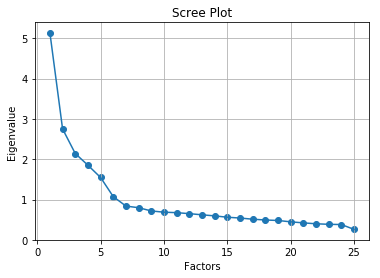

In [58]:
# Create scree plot using matplotlib
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

## Performing Factor Analysis

In [59]:
fa = FactorAnalyzer(5, rotation="varimax")
fa.fit(df)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
        method='minres', n_factors=5, rotation='varimax',
        rotation_kwargs={}, use_smc=True)

In [60]:
# 25*5(变量个数*因子个数)
fa.loadings_

array([[ 0.11112641,  0.04046493,  0.02279796, -0.42816554, -0.07793074],
       [ 0.029588  ,  0.21371606,  0.13903739,  0.62694553,  0.06213921],
       [ 0.00935691,  0.31784809,  0.10933115,  0.6507426 ,  0.05619584],
       [-0.06647574,  0.20456624,  0.23058374,  0.43562383, -0.1127004 ],
       [-0.12211317,  0.39303367,  0.08786921,  0.53708686,  0.0667076 ],
       [ 0.01041556,  0.07018423,  0.54582379,  0.03887794,  0.20958365],
       [ 0.08957412,  0.0332704 ,  0.64873118,  0.10278247,  0.11543389],
       [-0.03085502,  0.02390651,  0.55703585,  0.11157762, -0.00518271],
       [ 0.24041008, -0.0649837 , -0.63380555, -0.03749823, -0.107535  ],
       [ 0.29031777, -0.1763948 , -0.56246672, -0.04752477,  0.03682235],
       [ 0.04281888, -0.5748346 ,  0.03314352, -0.10481257, -0.05879528],
       [ 0.24474268, -0.67873071, -0.10248265, -0.11251716, -0.04200997],
       [ 0.02418041,  0.53681627,  0.08301031,  0.2579065 ,  0.28087733],
       [-0.11561383,  0.64683266,  0.1

## 下面图像的含义

- 每一个变量都可以由5个隐变量所表示
- $A1 = 0.11*F1 + 0.04*F2 + 0.023*F3 + -0.43*F4 + -0.078*F5$
- $A2 = 0.13*F1 + 0.21*F2 + 0.14*F3 + 0.63*F4 + 0.062*F5$

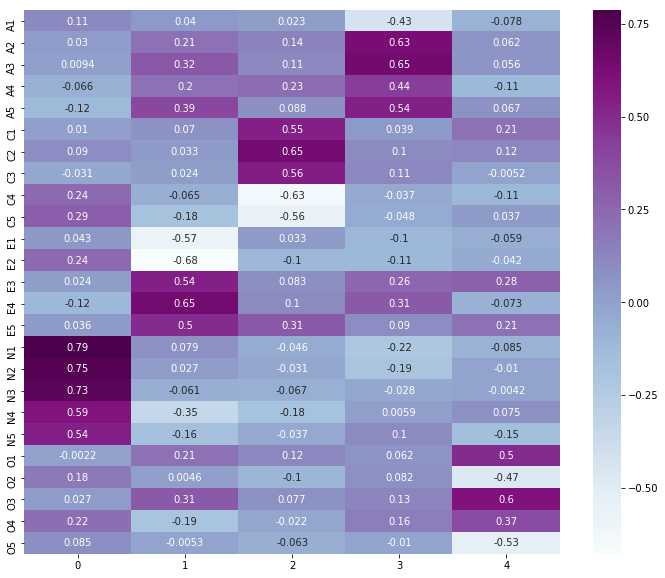

In [69]:
# 画为可视化的矩阵
import seaborn as sns

df_cm = pd.DataFrame(fa.loadings_, index=df.columns)

plt.figure(figsize = (12,10))
sns.heatmap(df_cm, annot=True, cmap="BuPu")

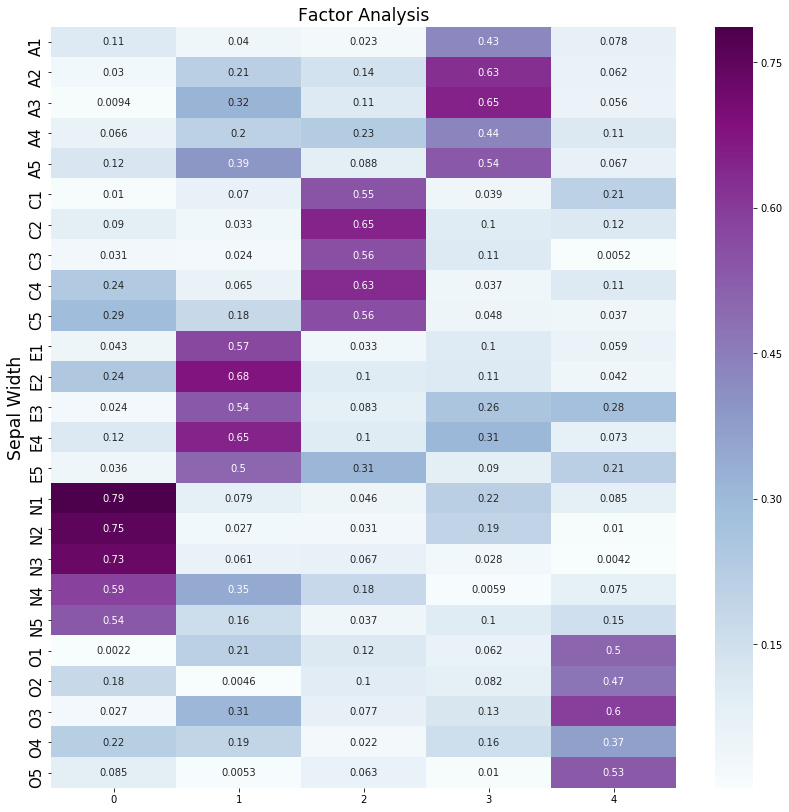

In [76]:
# 由于有负数, 我们看绝对值
# 我们顺便查看一下sns如何插入标题, 修改index字体的大小
df_cm = pd.DataFrame(np.abs(fa.loadings_), index=df.columns)

plt.figure(figsize = (14,14))
ax = sns.heatmap(df_cm, annot=True, cmap="BuPu")
# 设置y轴的字体的大小
ax.yaxis.set_tick_params(labelsize=15) 
plt.title('Factor Analysis', fontsize='xx-large')
# Set y-axis label
plt.ylabel('Sepal Width', fontsize='xx-large')
plt.savefig('factorAnalysis.png', dpi=500)

In [44]:
pd.DataFrame(fa.loadings_).apply(lambda x:np.sum(x**x), axis=1)

0     1.830503
1     2.592148
2     3.958522
3     4.039940
4     2.128067
5     3.026295
6     4.136256
7     4.068635
8     2.454219
9     0.709748
10    1.595012
11    1.781796
12    0.704117
13    3.864913
14    2.228543
15    3.844887
16    1.622270
17    1.677191
18    0.796146
19    2.527944
20    1.511613
21    3.055805
22    2.465272
23    3.941138
24    2.151519
25    1.762261
dtype: float64

In [22]:
ev, v = fa.get_eigenvalues()

In [23]:
ev

array([5.13457985, 2.75337527, 2.14814212, 1.85250623, 1.54846254,
       1.11066151, 0.98067695, 0.82430872, 0.79516217, 0.71828982,
       0.68602566, 0.67614851, 0.65177562, 0.62297416, 0.59623084,
       0.56244599, 0.54329886, 0.51434031, 0.49437154, 0.48263949,
       0.44865495, 0.42280589, 0.40028481, 0.38773757, 0.38183723,
       0.2622634 ])

In [24]:
v

array([ 4.59983501e+00,  2.26957033e+00,  1.55268827e+00,  1.21827690e+00,
        9.56298402e-01,  4.68285120e-01,  2.39380959e-01,  1.99072540e-01,
        1.06632115e-01,  8.81244936e-02,  7.00925419e-02,  3.14269166e-02,
        5.26243571e-03, -4.51157324e-03, -3.99578103e-02, -5.39060076e-02,
       -5.48076365e-02, -6.08308003e-02, -8.63359903e-02, -8.75712384e-02,
       -1.05339627e-01, -1.19380712e-01, -1.23391183e-01, -1.40324085e-01,
       -1.53685048e-01, -1.78235031e-01])

In [21]:
# Get variance of each factors
fa.get_factor_variance()

(array([2.73610909, 2.42804921, 2.08250383, 1.80050522, 1.54950194]),
 array([0.10523496, 0.09338651, 0.0800963 , 0.0692502 , 0.05959623]),
 array([0.10523496, 0.19862147, 0.27871777, 0.34796798, 0.4075642 ]))

## 转换为新的变量
- 每组数据使用5个隐特征进行表示

In [79]:
fa.transform(df).shape

(2436, 5)